In [11]:
import os
import pandas as pd
import numpy as np
import time
from load_data import LoadData
from collections import Counter
import matplotlib.pyplot as plt

In [12]:
loader = LoadData()

In [13]:
PATH = 'C:/Users/jtogt2/Notebook/'

In [14]:
loader.load_celldyn()
dataset = loader.retrieve_celldyn_frame()

In [15]:
dataset.shape

(3107036, 229)

In [16]:
afname = dataset['afname_dt']

In [17]:
years = []
for i in afname:
    if str(i.year) != '2021':
        years.append(str(i.year) + '-' + str(i.month)) 

In [18]:
cnt = Counter(years)

In [19]:
cnt = np.array(sorted(cnt.items()))

In [20]:
fixed_cnt = []
numbers_cnt = []
for i in range(0,len(cnt),12):
    fixed_cnt.append(cnt[i][0])
    fixed_cnt.append(cnt[i+4][0])
    fixed_cnt.append(cnt[i+5][0])
    fixed_cnt.append(cnt[i+6][0])
    fixed_cnt.append(cnt[i+7][0])
    fixed_cnt.append(cnt[i+8][0])
    fixed_cnt.append(cnt[i+9][0])
    fixed_cnt.append(cnt[i+10][0])
    fixed_cnt.append(cnt[i+11][0])
    fixed_cnt.append(cnt[i+1][0])
    fixed_cnt.append(cnt[i+2][0])
    fixed_cnt.append(cnt[i+3][0])

    numbers_cnt.append(cnt[i][1])
    numbers_cnt.append(cnt[i+4][1])
    numbers_cnt.append(cnt[i+5][1])
    numbers_cnt.append(cnt[i+6][1])
    numbers_cnt.append(cnt[i+7][1])
    numbers_cnt.append(cnt[i+8][1])
    numbers_cnt.append(cnt[i+9][1])
    numbers_cnt.append(cnt[i+10][1])
    numbers_cnt.append(cnt[i+11][1])
    numbers_cnt.append(cnt[i+1][1])
    numbers_cnt.append(cnt[i+2][1])
    numbers_cnt.append(cnt[i+3][1])

In [21]:
numbers_cnt = np.array(numbers_cnt).astype('int')

Text(0.5, 1.0, 'Samples tested over time')

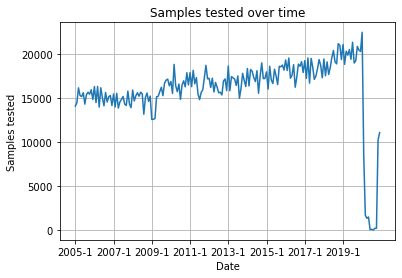

In [23]:
plt.plot(fixed_cnt, numbers_cnt)
plt.xticks(fixed_cnt[::24])
plt.xlabel('Date')
plt.ylabel('Samples tested')
plt.grid(True)
plt.title("Samples tested over time")
# plt.savefig('samples_time_with2020.png')

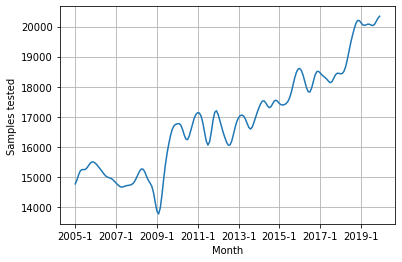

In [31]:
from scipy.ndimage.filters import gaussian_filter1d
plt.plot(fixed_cnt[:-12], gaussian_filter1d(numbers_cnt[:-12], sigma=2))
plt.xticks(fixed_cnt[::24])
plt.xlabel('Month')
plt.ylabel('Samples tested')
# plt.xticks(['2005-1', '2007', '2009', '2011', '2013', '2015', '2017', '2019'])
plt.grid(True)
# plt.title("Samples tested over time")
plt.savefig('samples_time_without2020.png')